<a href="https://colab.research.google.com/github/shaikasifthanveer/sk_asif_thanveer/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 0.0163
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0038
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0036
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0025
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0019
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0018
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0019
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0018
Epoch 9/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0018
Epoch 10/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0015
Epoch 11/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0018
Epoch 12/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0014
Epoch 13/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0014
Epoch 14/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0013
Epoch 15/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - loss: 0.0016
Epoch 16/20
9/9 ━━━━━━━━━━━━━━━━━━

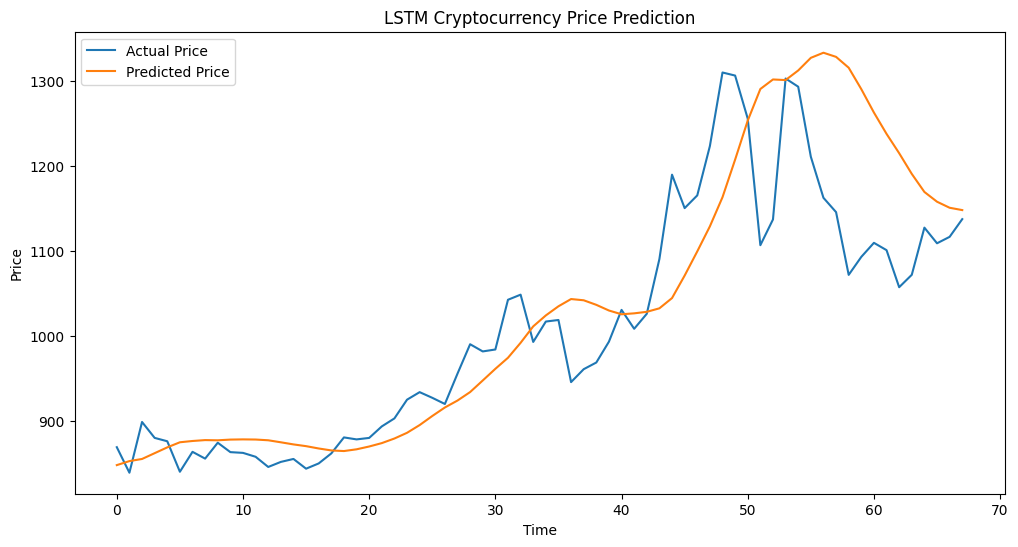

In [1]:
# Step 1: Install required libraries
!pip install pandas numpy matplotlib scikit-learn tensorflow

# Step 2: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Step 3: Load and preprocess data
df = pd.read_csv('combined_crypto_historical_data.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])
crypto = 'BNB'
df = df[df['symbol'] == crypto].sort_values('timestamp')

close_prices = df['close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_close = scaler.fit_transform(close_prices)

# Step 4: Prepare sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

seq_length = 60
X, y = create_sequences(scaled_close, seq_length)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Step 5: Train-test split
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Step 6: Build LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length, 1)),
    LSTM(50),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')

# Step 7: Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32)

# Step 8: Predict and inverse scale
y_pred_scaled = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_true = scaler.inverse_transform(y_test.reshape(-1, 1))

# Step 9: Calculate metrics
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
accuracy_pct = 100 - mape

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'MAPE: {mape:.2f}%')
print(f'Approximate Accuracy: {accuracy_pct:.2f}%')

# Step 10: Plot results
plt.figure(figsize=(12, 6))
plt.plot(y_true, label='Actual Price')
plt.plot(y_pred, label='Predicted Price')
plt.title('LSTM Cryptocurrency Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
